# AB Testing

## Significance Testing

We have two measurements. We want to know if there is a difference.

$$ X_1: \bar{X_1}, S_1$$

$$ X_2: \bar{X_2}, S_2$$

Assumptions:
- The means are different
- The standard deviations are the same

The second is important. If we have two measurements of what we assume is the same standard deviation, we can do a weighted average to estimate the pooled standard deviation. This is the same as using the data from both measurements to calculate a standard deviation.

If we have two measurements that are different standard deviations, and we need to combine them, we tend to do use RMS (Root Mean Square). With that we end up with something larger than either one, but not as big as both added together.

### Pooled Variance

The estimated standard deviation of both $X_1$ and $X_2$ (i.e. the pooled standard deviation) is:

$$
S_p = \sqrt{
  \frac{N_1 S_1 + N_2 S_2}
       {N_1 + N_2}
}
$$ 

If N is the same this reduces to:

$$
S_p = \sqrt{
  \frac{S_1 + S_2}
       {2}
}
$$ 

### T Statistic

Now we want to estimate the standard deviation of the difference $\bar{X_1} - \bar{X_2}$. We estimate the variance of each of those as $\frac{S_p^2}{N}$ ([standard error of the mean](https://en.wikipedia.org/wiki/Standard_error)), then combine those using RMS:

$$
\begin{array}{lcl}
& = & \sqrt{
  \frac{S_p^2}{N} + \frac{S_p^2}{N}
} \\
& = & S_p \sqrt{
  \frac{1}{N} + \frac{1}{N}
} \\
& = & S_p \sqrt{
  \frac{2}{N}
} \\
\end{array}
$$

Putting that all together we get:

$$ \text{t_statistic} = 
\frac{\bar{X_1} - \bar{X_2}}
     {S_p \sqrt{\frac{2}{N}}}
$$

## Chi Square Test

We can use the chi square test to test if there is a significant difference between two scenarios. An example of this is with click through rates. We would collect the following information:

Advertisement | Click | No Click
---                     | ---   | ---
A | 36 | 14
B | 30 | 25

We can calculate the expected value of a click:

$$ 
\begin{array}{rcl}
  \text{Total Observations}(N) & = & \text{Click} + \text{No Click}\\
  N & = & 36 + 30 + 14 + 25 \\
\end{array}
$$

$$ 
\begin{array}{rclcl}
  E[Click] & = & \frac{\sum{Click}}{N} & = & \frac{36 + 30}{N}  \\
  E[No Click] & = & \frac{\sum{No Click}}{N} & = & \frac{14 + 25}{N}
\end{array}
$$

The chi square test measures the distance of each value from the expected value to determine if the total delta is significant(*).

The deltas are calculated as:

$$
\begin{array}{ccc}
  \text{Advertisement} & \text{Click} & \text{No Click} \\
  \text{A} & \small{T[A, Click] - E[Click]\sum{A}} & \small{T[A, No Click] - E[No Click]\sum{A}} \\
  \text{B} & \small{T[B, Click] - E[Click]\sum{B}} & \small{T[B, No Click] - E[No Click]\sum{B}} \\
\end{array}
$$


(*) Remember the chi square distribution is the distribution of a sum of independent squares.



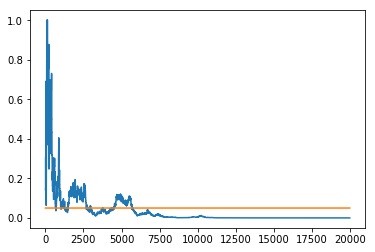

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2
    
def get_p_value(T):
    det = T[0, 0]*T[1,1] - T[0,1]*T[1,0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    p = 1 - chi2.cdf(x=c2, df=1)
    return p

def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2, 2)).astype(np.float32)
    for i in xrange(N):
        c1, c2 = data.next()
        T[0,c1] += 1
        T[1,c2] += 1
        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()

run_experiment(0.1, 0.11, 20000)
        
        

## Bayesian A/B Testing